# Import Relevant Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Raw Data and Find Vinyl Peak

In [2]:
# Import raw data
df = pd.read_csv('t30_1.txt', delimiter = '\t') # Tab delimited.
df = df.drop(df.columns[0:3], axis=1) # Drop 1st 3 columns.
df

,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,139.855275,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
0,862.0,971.0,1323.0,1354.0,1447.0,1687.0,1706.0,1800.0,1888.0,2040.0,...,3331.0,3376.0,3351.0,3419.0,3339.0,3302.0,3250.0,3288.0,3302.0,3348.0
1,892.0,1146.0,1339.0,1457.0,1633.0,1671.0,1824.0,1995.0,2104.0,2042.0,...,3431.0,3608.0,3593.0,3517.0,3523.0,3709.0,3483.0,3662.0,3594.0,3669.0
2,921.0,1179.0,1336.0,1485.0,1591.0,1712.0,1827.0,2093.0,2133.0,2271.0,...,3627.0,3755.0,3780.0,3678.0,3789.0,3735.0,3635.0,3623.0,3727.0,3784.0
3,873.0,1111.0,1406.0,1459.0,1650.0,1816.0,1872.0,2101.0,2058.0,2229.0,...,3806.0,3676.0,3634.0,3697.0,3593.0,3707.0,3744.0,3723.0,3859.0,3800.0
4,966.0,1132.0,1439.0,1498.0,1711.0,1824.0,2016.0,2019.0,2130.0,2295.0,...,3846.0,3929.0,3768.0,3807.0,3894.0,3800.0,3827.0,3799.0,3932.0,3912.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,421.0,493.0,641.0,695.0,729.0,773.0,798.0,857.0,942.0,981.0,...,1100.0,1107.0,1059.0,1193.0,1038.0,1070.0,1045.0,1098.0,1077.0,1105.0
340,438.0,564.0,718.0,755.0,746.0,781.0,854.0,881.0,920.0,967.0,...,1132.0,1155.0,1075.0,1199.0,1017.0,1082.0,1081.0,1155.0,1116.0,1098.0
341,397.0,514.0,662.0,703.0,746.0,740.0,766.0,808.0,861.0,964.0,...,1055.0,1110.0,985.0,1085.0,1133.0,1091.0,1154.0,1088.0,1104.0,1072.0
342,416.0,535.0,678.0,677.0,693.0,735.0,827.0,776.0,879.0,912.0,...,1059.0,1123.0,992.0,1158.0,1026.0,1109.0,1037.0,1117.0,1089.0,1226.0


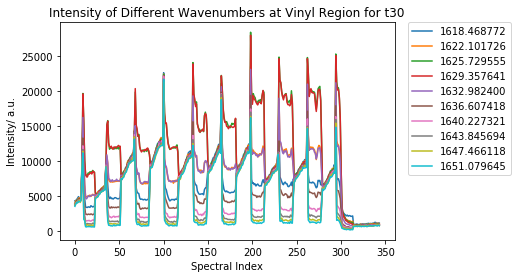

In [3]:
# Find out Vinyl Peak Wavenumber = ~1630 cm-1 Region

df.iloc[:, 375:385].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity/ a.u.')
plt.title('Intensity of Different Wavenumbers at Vinyl Region for t30')
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.show() 
# Plot all columns in the region to see which intensity is the highest. Pick that index location.
# The vinyl peak is the wavenumber with the highest intensity.

In [4]:
# df.loc[:,'1629.357641'] --> When using loc.
# df.columns.get_loc('1629.357641') #--> Use the get_loc command on the column index to find the index location. 
# df.iloc[:,378] --> When using iloc

# Column index 378 is equivalent to column label '1629.357641'. Use relevant parameter for iloc and loc respectively.

# Filter Relevant Spectra

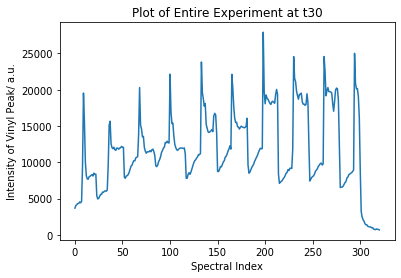

In [5]:
# Plot Vinyl Peak Wavenumber Column out.
df.loc[:320,'1629.357641'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Plot of Entire Experiment at t30')
plt.show()

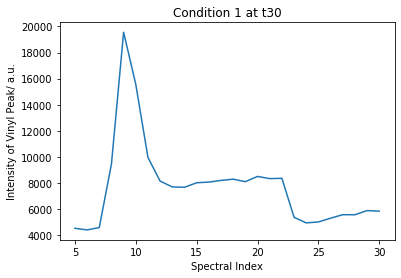

In [6]:
# Condition
df.loc[5:30,'1629.357641'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 at t30')
plt.show()

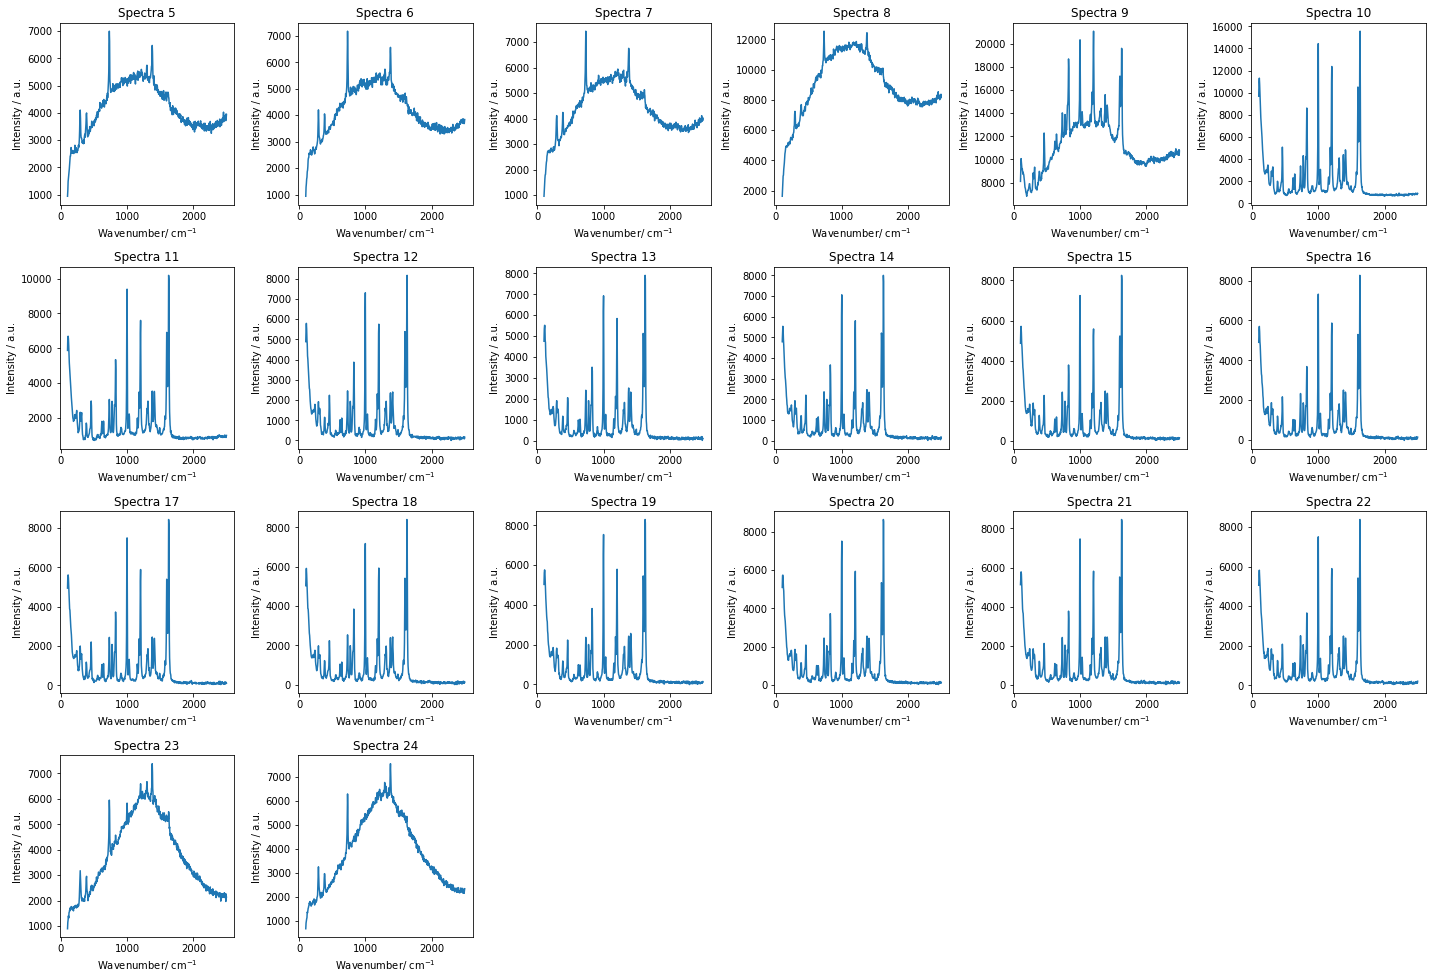

In [7]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(5, 25):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-4))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [8]:
# Filter out relevant data to be stored and used for AUC analysis.

condition1_ss = df.loc[15:19, :]
condition1_ss.insert(loc = 0, column = 'Condition', value =10)
condition1_ss

,Condition,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
15,10,4863.0,5553.0,5708.0,5387.0,4885.0,4676.0,4343.0,3935.0,3654.0,...,116.0,149.0,93.0,131.0,78.0,155.0,65.0,123.0,138.0,134.0
16,10,4903.0,5497.0,5699.0,5427.0,4934.0,4731.0,4249.0,3925.0,3596.0,...,89.0,129.0,46.0,170.0,42.0,108.0,69.0,97.0,96.0,147.0
17,10,4945.0,5529.0,5617.0,5465.0,5101.0,4683.0,4317.0,3893.0,3834.0,...,117.0,163.0,77.0,168.0,148.0,83.0,94.0,159.0,135.0,117.0
18,10,5036.0,5627.0,5917.0,5626.0,5171.0,4752.0,4388.0,3876.0,3852.0,...,82.0,154.0,103.0,174.0,69.0,103.0,78.0,157.0,92.0,132.0
19,10,5036.0,5627.0,5766.0,5660.0,5175.0,4685.0,4352.0,4042.0,3629.0,...,114.0,118.0,70.0,101.0,71.0,116.0,88.0,118.0,98.0,145.0


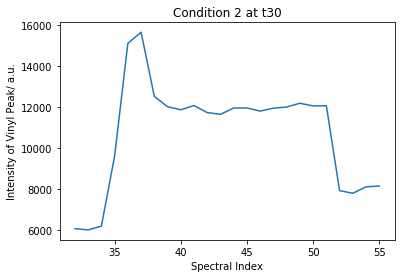

In [9]:
# Condition
df.loc[32:55,'1629.357641'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 2 at t30')
plt.show()

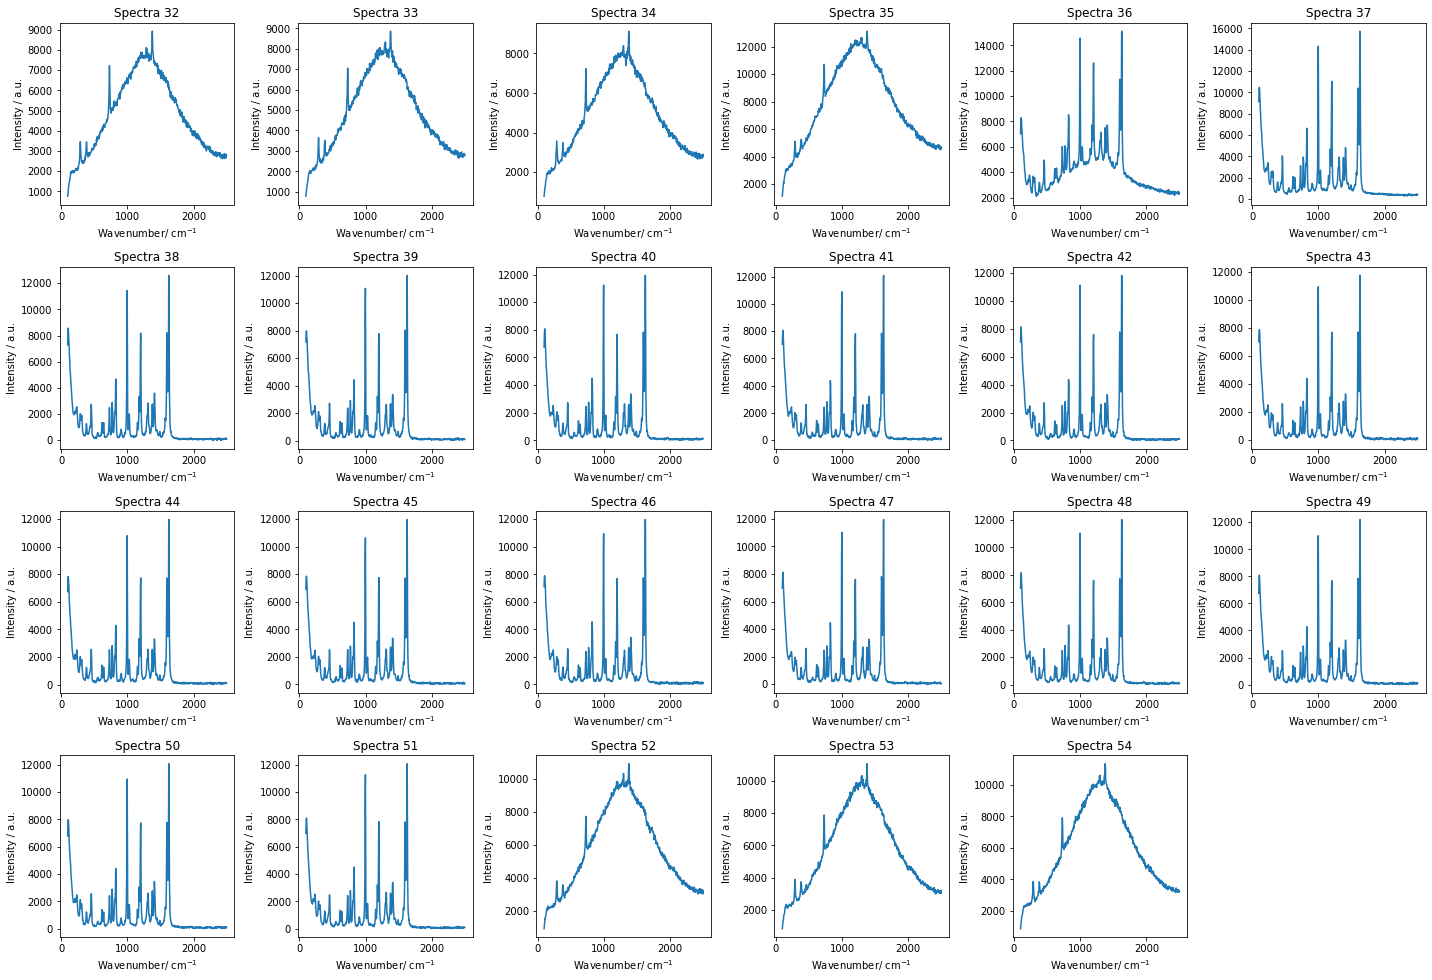

In [10]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(32, 55):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-31))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [11]:
# Filter out relevant data to be stored and used for AUC analysis.

condition2_ss = df.loc[44:48, :]
condition2_ss.insert(loc = 0, column = 'Condition', value =11)
condition2_ss

,Condition,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
44,11,6748.0,7598.0,7839.0,7517.0,7266.0,6444.0,5980.0,5425.0,4978.0,...,108.0,139.0,94.0,169.0,126.0,102.0,80.0,99.0,122.0,109.0
45,11,6898.0,7654.0,7858.0,7634.0,7102.0,6572.0,5824.0,5462.0,5044.0,...,85.0,96.0,89.0,166.0,82.0,108.0,27.0,86.0,64.0,66.0
46,11,7104.0,7829.0,7889.0,7714.0,7181.0,6583.0,5852.0,5461.0,5101.0,...,123.0,178.0,95.0,150.0,128.0,130.0,42.0,128.0,63.0,135.0
47,11,6978.0,7657.0,8137.0,7511.0,6996.0,6522.0,6015.0,5479.0,5164.0,...,81.0,59.0,57.0,168.0,63.0,49.0,24.0,93.0,65.0,40.0
48,11,7021.0,7802.0,8150.0,7841.0,7153.0,6542.0,5926.0,5471.0,5142.0,...,135.0,101.0,131.0,157.0,126.0,93.0,39.0,119.0,122.0,95.0


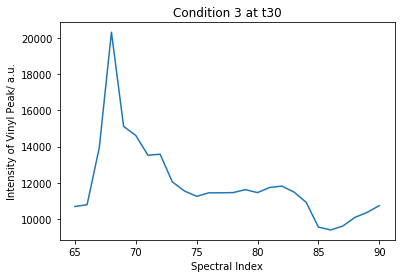

In [12]:
# Condition
df.loc[65:90,'1629.357641'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 3 at t30')
plt.show()

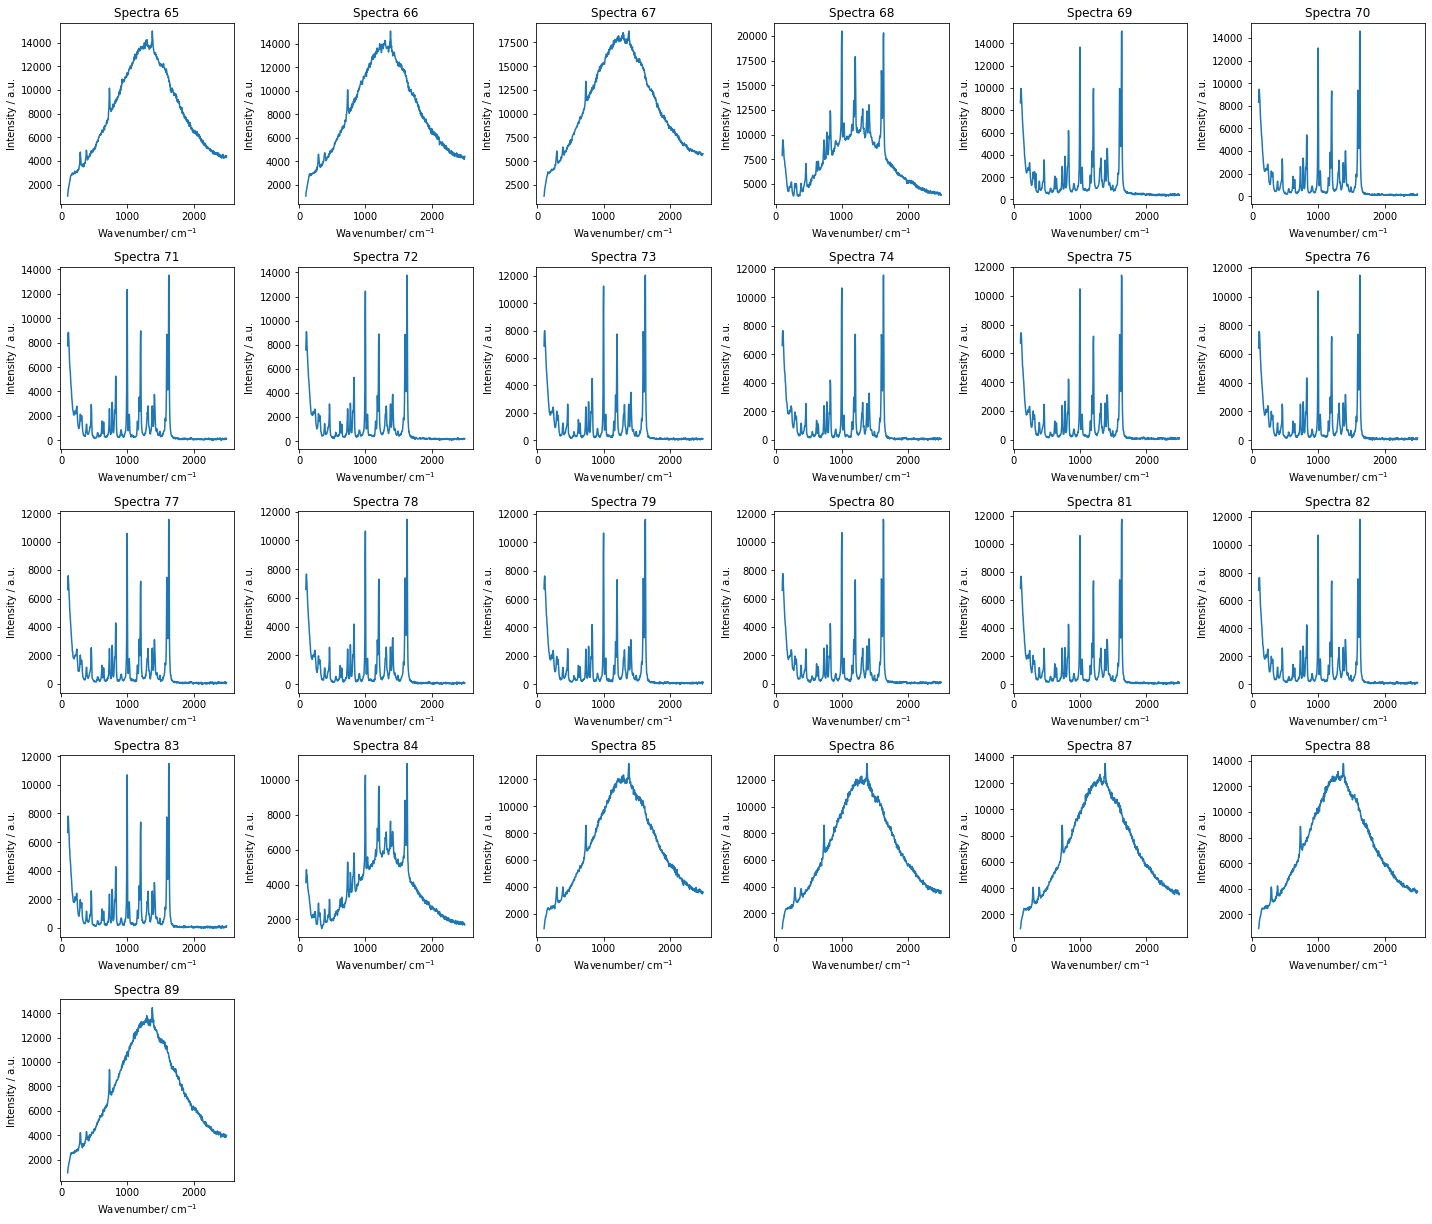

In [13]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(65, 90):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-64))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [14]:
# Filter out relevant data to be stored and used for AUC analysis.

condition3_ss = df.loc[77:81, :]
condition3_ss.insert(loc = 0, column = 'Condition', value =12)
condition3_ss

,Condition,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
77,12,6623.0,7357.0,7599.0,7182.0,6799.0,6288.0,5800.0,5230.0,4887.0,...,65.0,151.0,90.0,120.0,79.0,101.0,5.0,82.0,72.0,96.0
78,12,6592.0,7370.0,7653.0,7273.0,6709.0,6248.0,5730.0,5313.0,4912.0,...,111.0,99.0,110.0,158.0,74.0,80.0,49.0,101.0,47.0,105.0
79,12,6732.0,7312.0,7631.0,7496.0,6672.0,6421.0,5872.0,5223.0,4854.0,...,85.0,146.0,80.0,113.0,128.0,96.0,3.0,155.0,73.0,135.0
80,12,6597.0,7453.0,7767.0,7274.0,6958.0,6258.0,5893.0,5405.0,4894.0,...,94.0,131.0,31.0,127.0,76.0,126.0,72.0,47.0,83.0,97.0
81,12,6824.0,7399.0,7686.0,7350.0,6868.0,6481.0,5813.0,5350.0,4985.0,...,84.0,133.0,70.0,171.0,73.0,105.0,36.0,126.0,56.0,117.0


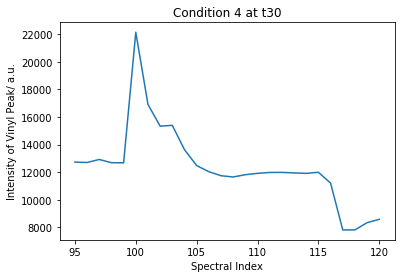

In [15]:
# Condition
df.loc[95:120,'1629.357641'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 4 at t30')
plt.show()

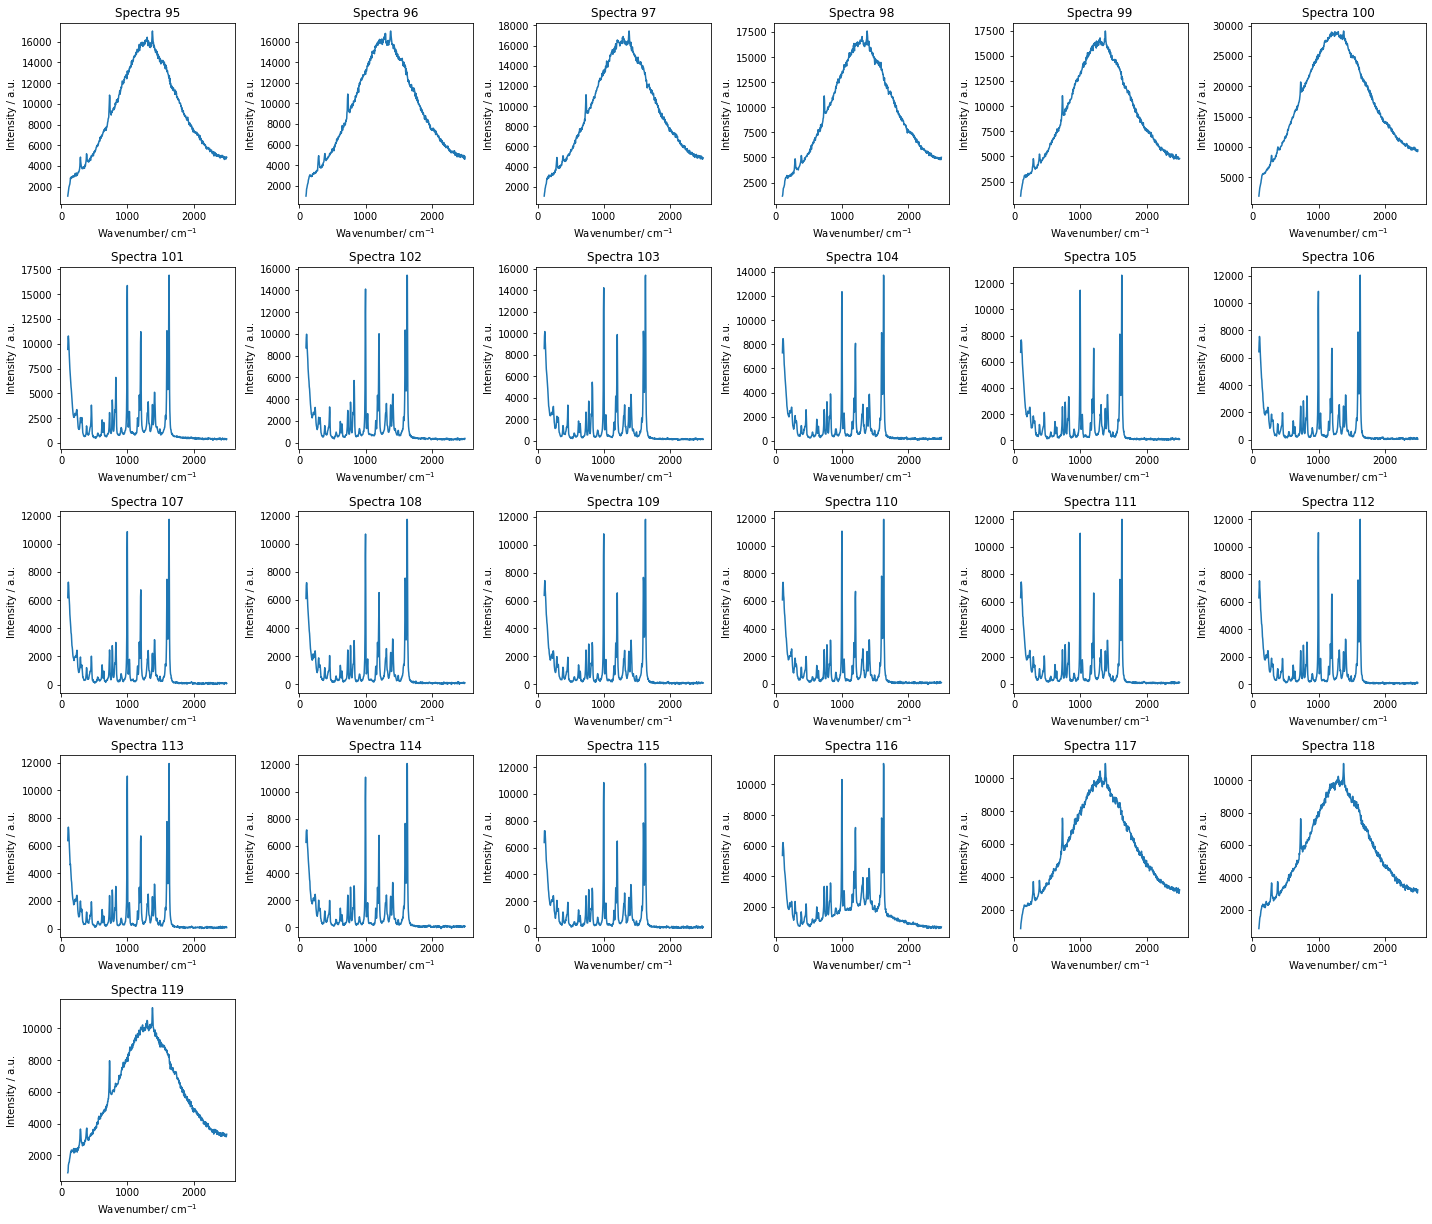

In [16]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(95, 120):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-94))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [17]:
# Filter out relevant data to be stored and used for AUC analysis.

condition4_ss = df.loc[110:114, :]
condition4_ss.insert(loc = 0, column = 'Condition', value =13)
condition4_ss

,Condition,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
110,13,6076.0,7148.0,7351.0,7006.0,6400.0,6195.0,5510.0,5114.0,4909.0,...,68.0,139.0,68.0,164.0,61.0,59.0,49.0,99.0,94.0,87.0
111,13,6284.0,7061.0,7422.0,7166.0,6686.0,5977.0,5620.0,4932.0,4853.0,...,111.0,115.0,68.0,144.0,89.0,54.0,77.0,81.0,142.0,121.0
112,13,6286.0,6938.0,7519.0,7044.0,6580.0,6171.0,5439.0,5190.0,4808.0,...,105.0,76.0,94.0,84.0,167.0,101.0,60.0,141.0,142.0,108.0
113,13,6366.0,7115.0,7340.0,7148.0,6644.0,6174.0,5649.0,5175.0,4610.0,...,121.0,131.0,58.0,137.0,98.0,92.0,89.0,136.0,125.0,66.0
114,13,6262.0,7053.0,7179.0,7161.0,6521.0,6032.0,5725.0,5273.0,4899.0,...,84.0,82.0,67.0,124.0,68.0,73.0,19.0,105.0,57.0,81.0


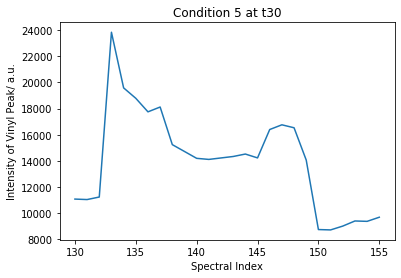

In [18]:
# Condition
df.loc[130:155,'1629.357641'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 5 at t30')
plt.show()

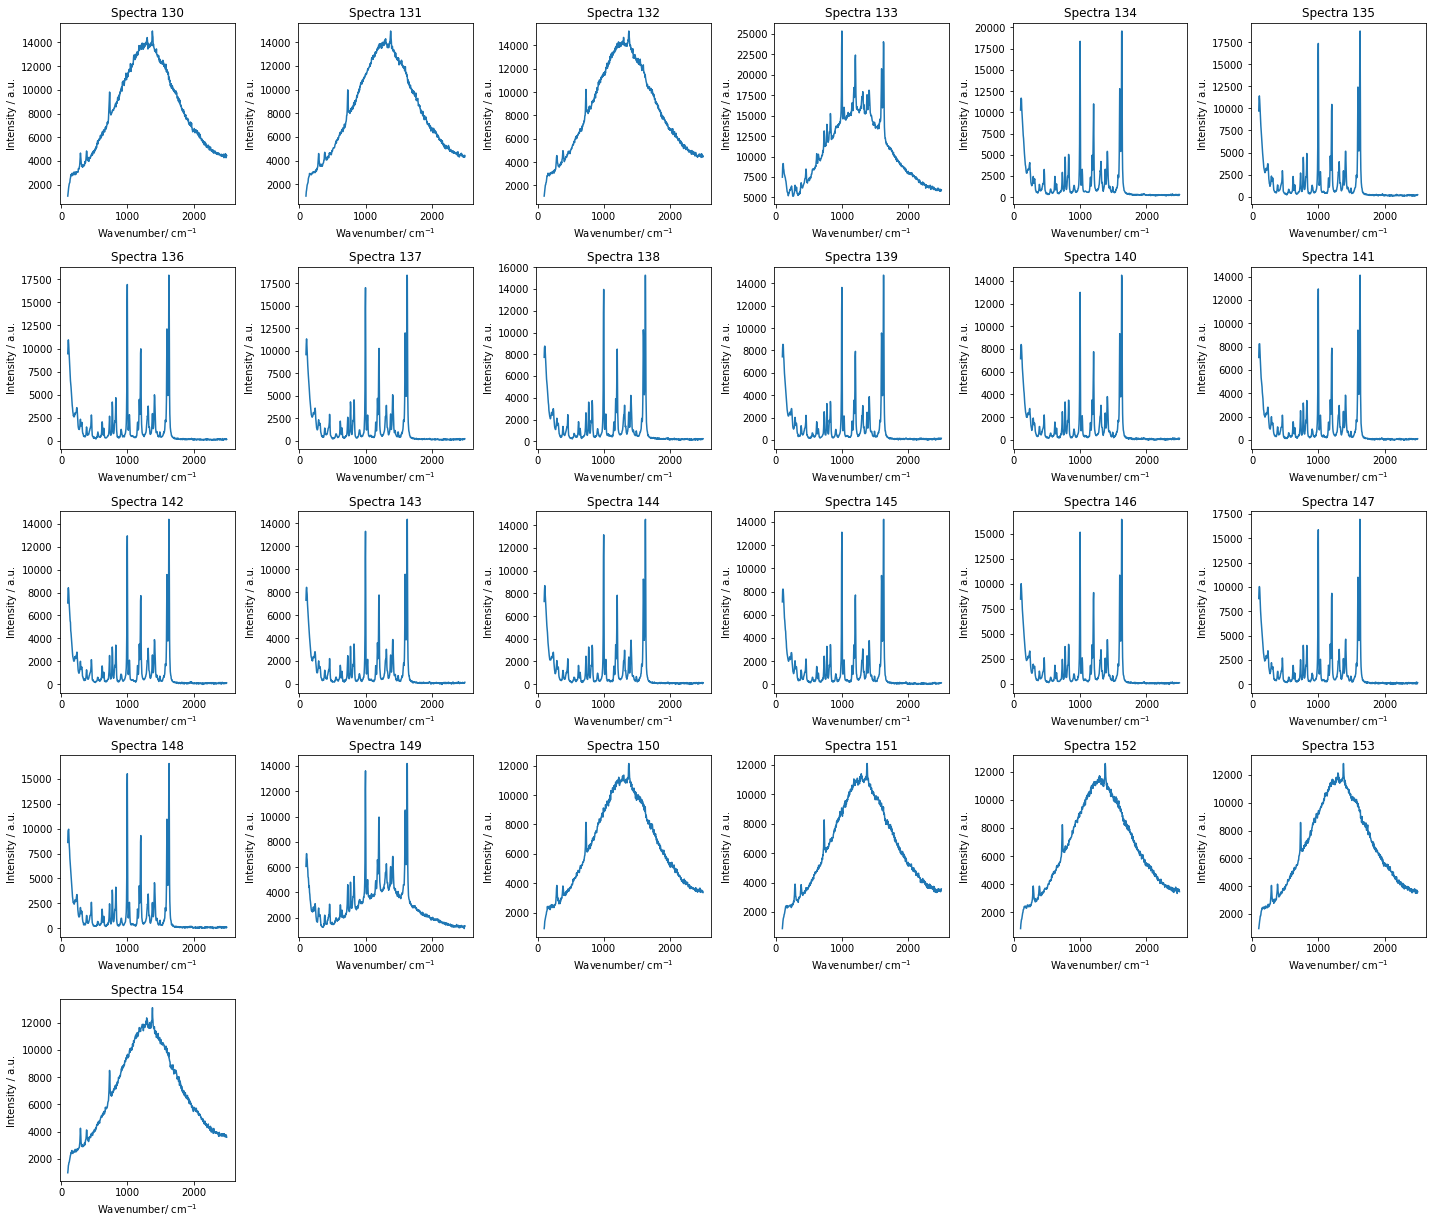

In [19]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(130, 155):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-129))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [20]:
# Filter out relevant data to be stored and used for AUC analysis.

condition5_ss = df.loc[141:145, :]
condition5_ss.insert(loc = 0, column = 'Condition', value =14)
condition5_ss

,Condition,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
141,14,7064.0,8162.0,8240.0,8231.0,7494.0,6957.0,6327.0,5851.0,5322.0,...,58.0,93.0,49.0,101.0,68.0,68.0,46.0,67.0,65.0,93.0
142,14,7089.0,8182.0,8417.0,8202.0,7532.0,6905.0,6454.0,5921.0,5527.0,...,82.0,117.0,55.0,114.0,76.0,99.0,52.0,120.0,83.0,102.0
143,14,7296.0,8168.0,8419.0,8145.0,7793.0,7003.0,6532.0,6018.0,5455.0,...,100.0,118.0,89.0,120.0,64.0,117.0,75.0,75.0,99.0,151.0
144,14,7288.0,8187.0,8686.0,8167.0,7730.0,7020.0,6534.0,6111.0,5666.0,...,106.0,146.0,120.0,108.0,105.0,97.0,43.0,142.0,81.0,117.0
145,14,7119.0,8105.0,8224.0,8094.0,7594.0,6905.0,6325.0,5742.0,5500.0,...,150.0,124.0,146.0,129.0,129.0,101.0,109.0,131.0,114.0,134.0


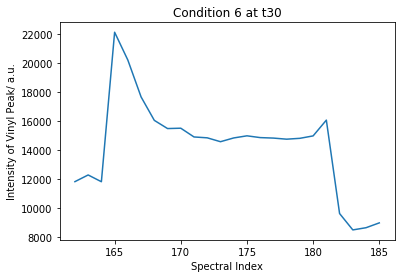

In [21]:
# Condition
df.loc[162:185,'1629.357641'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 6 at t30')
plt.show()

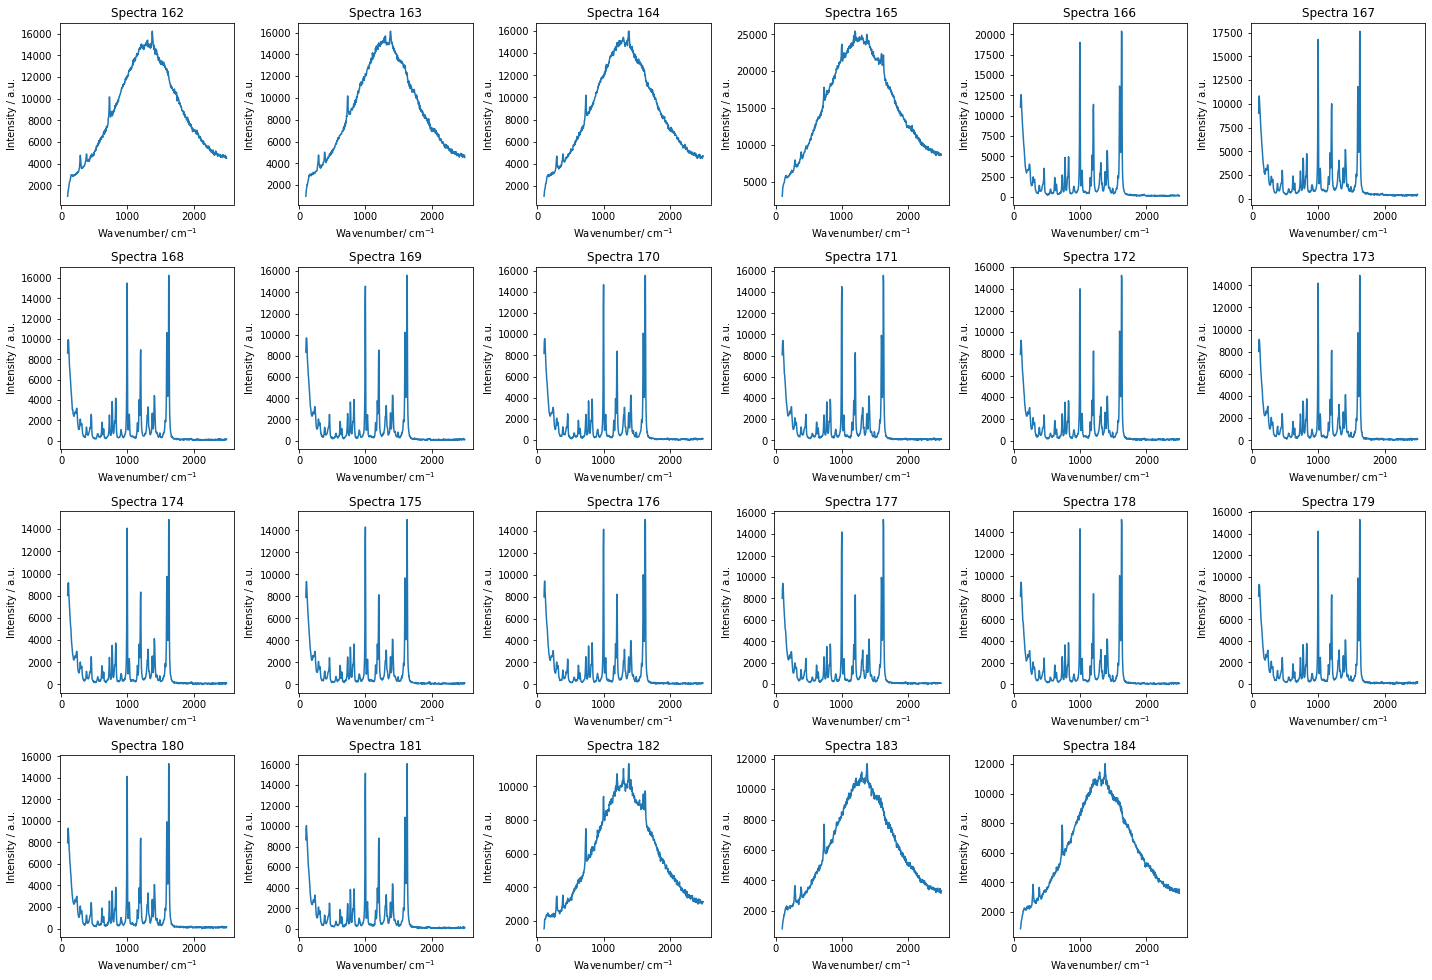

In [22]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(162, 185):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-161))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [23]:
# Filter out relevant data to be stored and used for AUC analysis.

condition6_ss = df.loc[176:180, :]
condition6_ss.insert(loc = 0, column = 'Condition', value =15)
condition6_ss

,Condition,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
176,15,7977.0,8960.0,9418.0,8867.0,8381.0,7661.0,6995.0,6505.0,5961.0,...,96.0,71.0,111.0,112.0,85.0,138.0,69.0,106.0,144.0,117.0
177,15,8016.0,9107.0,9399.0,9058.0,8434.0,7545.0,7045.0,6372.0,6031.0,...,78.0,122.0,79.0,130.0,96.0,90.0,108.0,110.0,105.0,93.0
178,15,8107.0,8957.0,9413.0,9121.0,8380.0,7686.0,7087.0,6489.0,5866.0,...,122.0,80.0,82.0,155.0,92.0,104.0,63.0,102.0,133.0,101.0
179,15,8174.0,9098.0,9268.0,9124.0,8443.0,7938.0,7131.0,6613.0,6020.0,...,131.0,104.0,139.0,191.0,78.0,84.0,90.0,170.0,50.0,170.0
180,15,7967.0,8914.0,9321.0,8787.0,8227.0,7389.0,7117.0,6428.0,6076.0,...,94.0,130.0,150.0,159.0,80.0,111.0,67.0,159.0,100.0,140.0


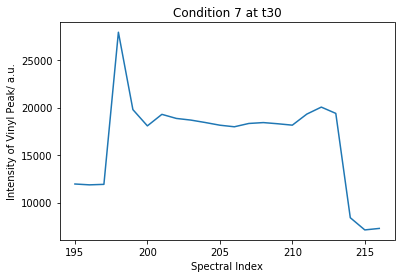

In [24]:
# Condition
df.loc[195:216,'1629.357641'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 7 at t30')
plt.show()

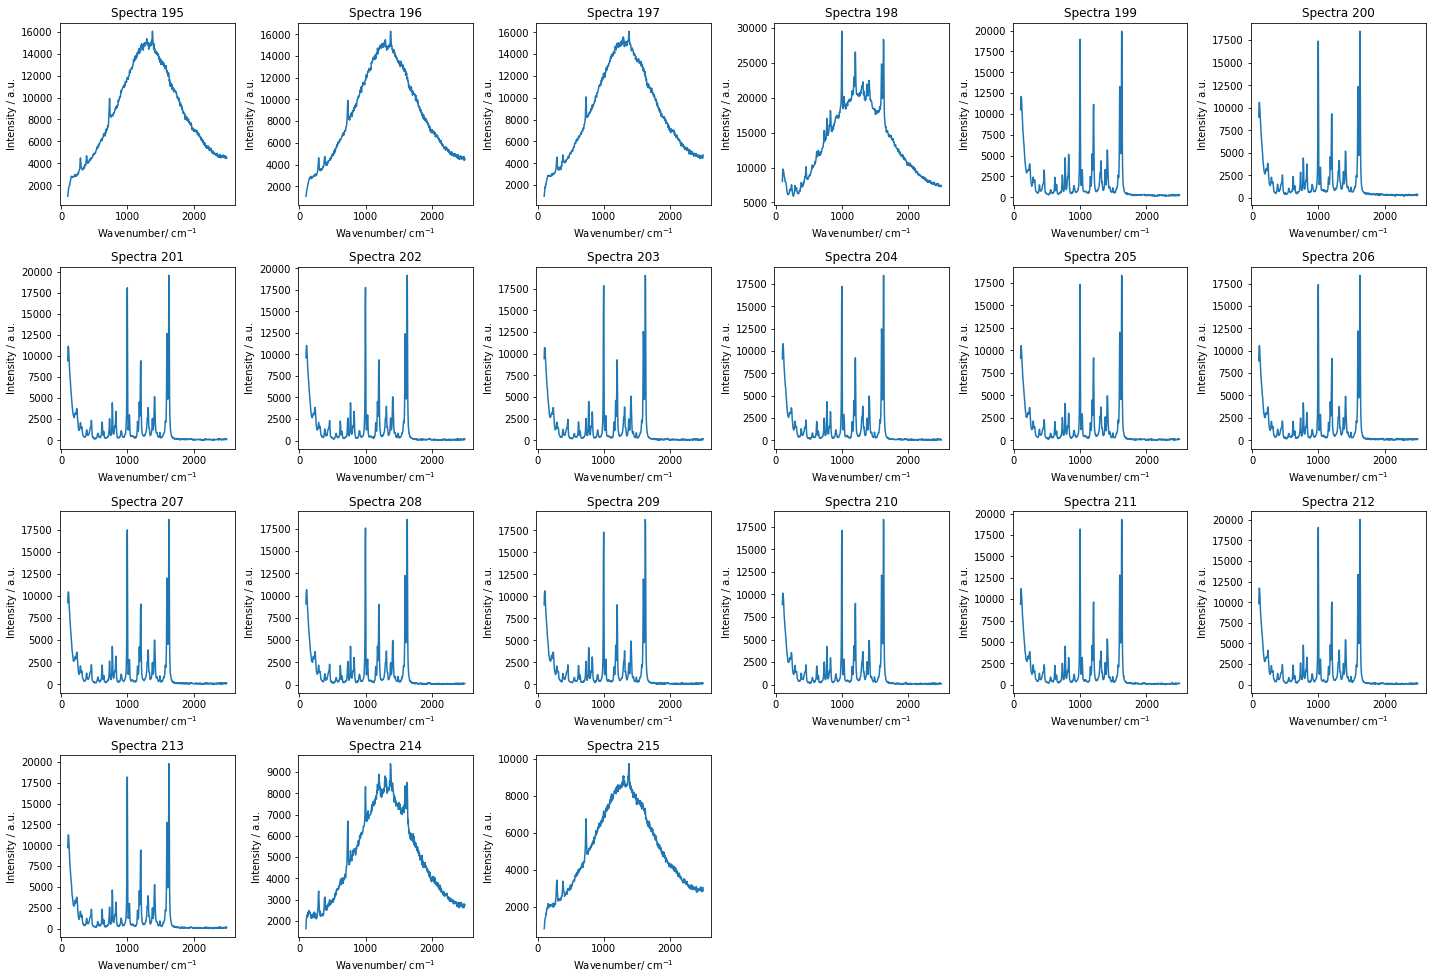

In [25]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(195, 216):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-194))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [26]:
# Filter out relevant data to be stored and used for AUC analysis.

condition7_ss = df.loc[205:209, :]
condition7_ss.insert(loc = 0, column = 'Condition', value =16)
condition7_ss

,Condition,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
205,16,9119.0,10145.0,10514.0,10034.0,9445.0,8543.0,8085.0,7274.0,6826.0,...,103.0,141.0,117.0,181.0,140.0,143.0,67.0,94.0,141.0,143.0
206,16,8883.0,10297.0,10573.0,10359.0,9371.0,8779.0,7936.0,7340.0,6847.0,...,162.0,137.0,110.0,178.0,133.0,118.0,78.0,178.0,69.0,132.0
207,16,9233.0,10087.0,10458.0,10304.0,9464.0,8771.0,8159.0,7593.0,6978.0,...,114.0,175.0,88.0,184.0,124.0,139.0,71.0,166.0,90.0,128.0
208,16,9093.0,10410.0,10670.0,10432.0,9543.0,8812.0,8193.0,7354.0,6977.0,...,121.0,168.0,85.0,174.0,104.0,118.0,110.0,122.0,122.0,131.0
209,16,9043.0,10266.0,10639.0,10346.0,9549.0,8825.0,8029.0,7521.0,6872.0,...,156.0,158.0,100.0,170.0,111.0,122.0,51.0,156.0,188.0,163.0


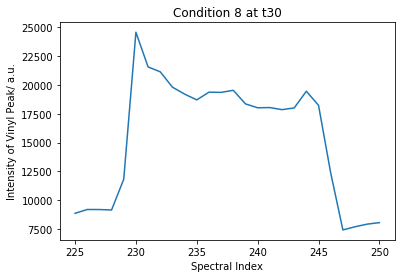

In [27]:
# Condition
df.loc[225:250,'1629.357641'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 8 at t30')
plt.show()

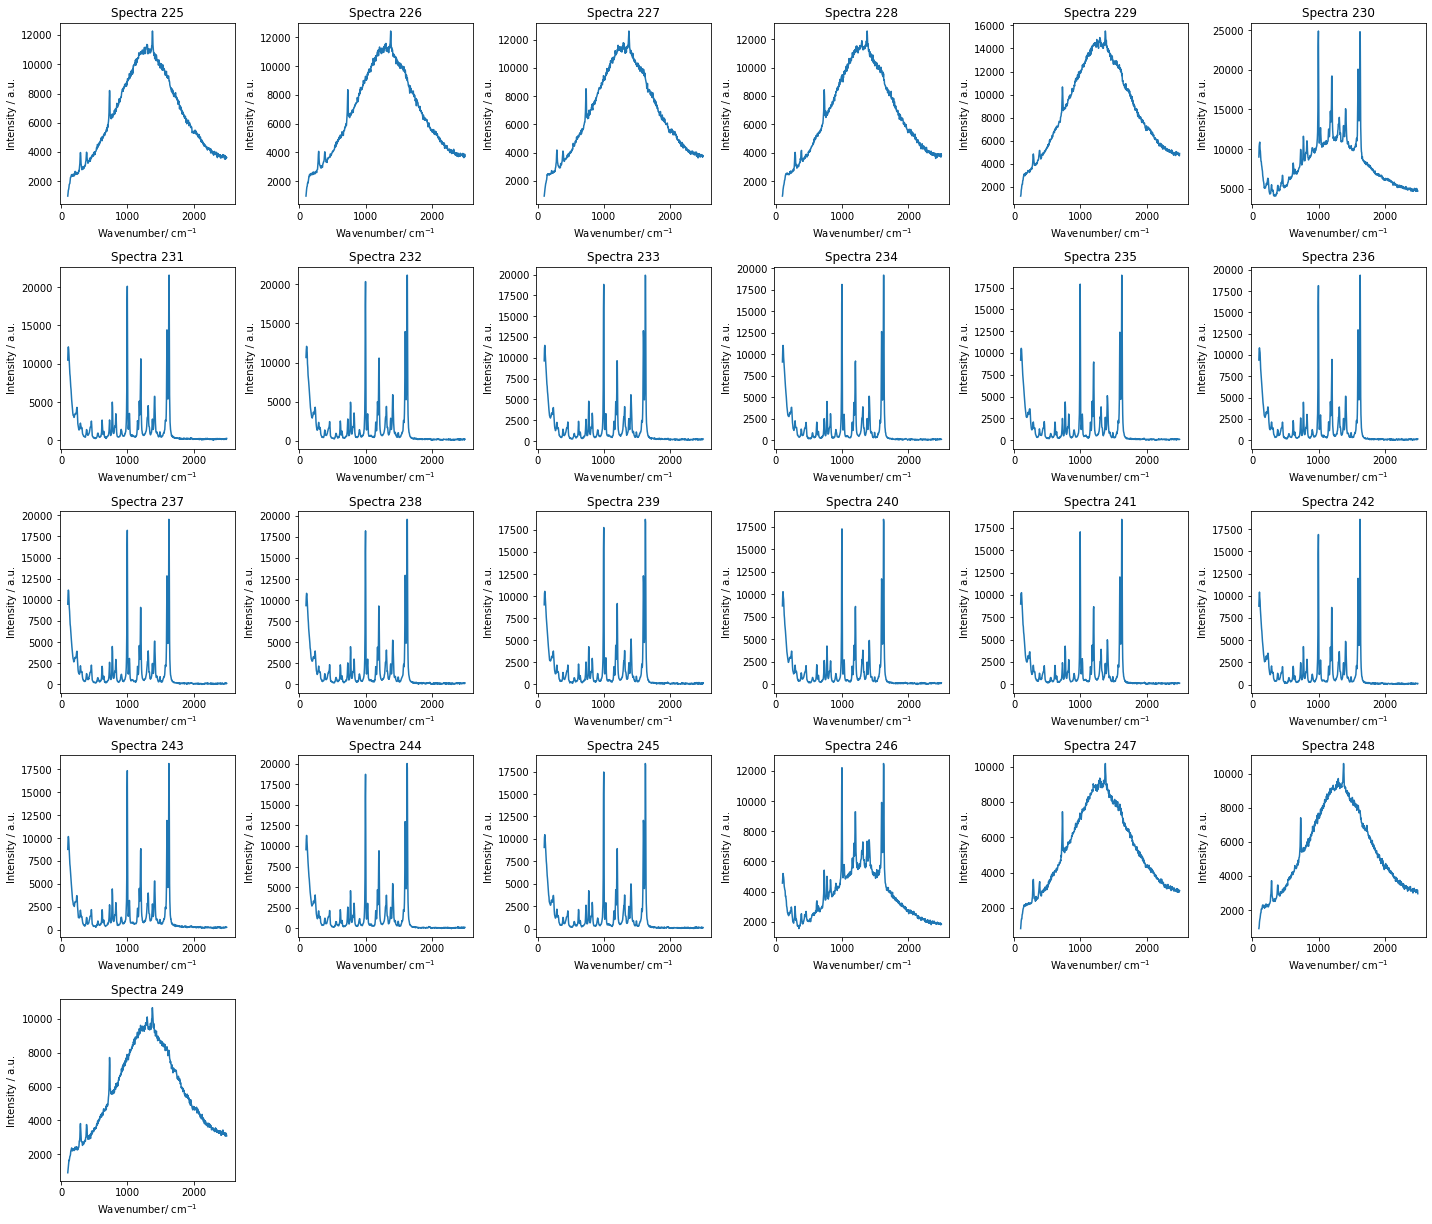

In [28]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(225, 250):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-224))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [29]:
# Filter out relevant data to be stored and used for AUC analysis.

condition8_ss = df.loc[239:243, :]
condition8_ss.insert(loc = 0, column = 'Condition', value =17)
condition8_ss

,Condition,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
239,17,9020.0,10325.0,10548.0,10196.0,9659.0,8955.0,8239.0,7583.0,7089.0,...,82.0,143.0,70.0,162.0,92.0,128.0,38.0,174.0,104.0,181.0
240,17,8700.0,9903.0,10277.0,9711.0,9420.0,8508.0,7687.0,7304.0,6658.0,...,109.0,155.0,98.0,163.0,97.0,154.0,105.0,135.0,88.0,148.0
241,17,8981.0,10071.0,10197.0,10250.0,9493.0,8591.0,7921.0,7389.0,6685.0,...,122.0,164.0,109.0,126.0,158.0,119.0,120.0,99.0,131.0,125.0
242,17,8833.0,9829.0,10417.0,9802.0,9420.0,8487.0,7938.0,7191.0,6677.0,...,150.0,149.0,132.0,136.0,124.0,108.0,68.0,135.0,110.0,111.0
243,17,8772.0,9752.0,10170.0,9929.0,9190.0,8471.0,7636.0,7192.0,6869.0,...,277.0,312.0,247.0,315.0,268.0,266.0,270.0,287.0,270.0,291.0


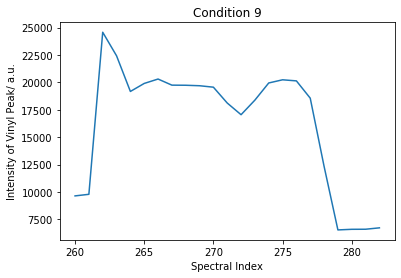

In [30]:
# Condition
df.loc[260:282,'1629.357641'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 9')
plt.show()

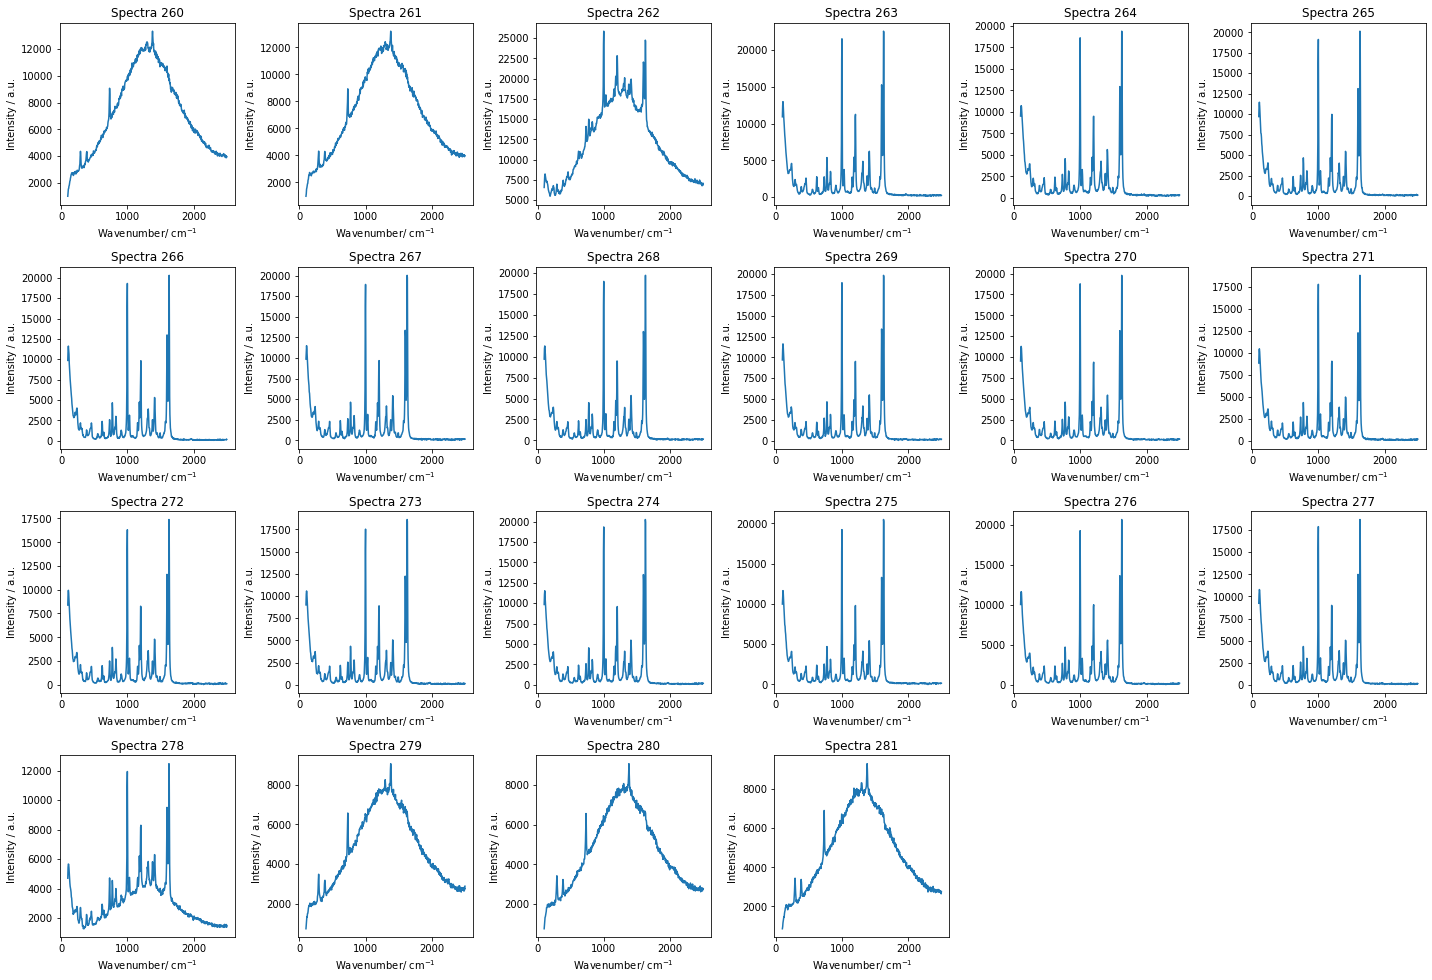

In [31]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(260, 282):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-259))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [32]:
# Filter out relevant data to be stored and used for AUC analysis.

condition9_ss = df.loc[265:269, :]
condition9_ss.insert(loc = 0, column = 'Condition', value =18)
condition9_ss

,Condition,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
265,18,9705.0,10957.0,11458.0,10971.0,10197.0,9558.0,8837.0,7688.0,7615.0,...,146.0,133.0,129.0,212.0,101.0,160.0,77.0,148.0,141.0,118.0
266,18,9854.0,11062.0,11612.0,11107.0,10631.0,9467.0,8769.0,7964.0,7512.0,...,128.0,123.0,108.0,112.0,99.0,96.0,97.0,166.0,118.0,142.0
267,18,9857.0,10786.0,11487.0,11059.0,10228.0,9366.0,8848.0,8059.0,7465.0,...,149.0,181.0,113.0,171.0,104.0,178.0,106.0,158.0,121.0,138.0
268,18,9714.0,10994.0,11289.0,10809.0,10284.0,9394.0,8714.0,7871.0,7494.0,...,117.0,158.0,28.0,154.0,115.0,127.0,70.0,133.0,174.0,162.0
269,18,9688.0,10993.0,11621.0,11171.0,10392.0,9707.0,8672.0,7974.0,7520.0,...,172.0,182.0,127.0,159.0,161.0,157.0,139.0,145.0,106.0,156.0


In [33]:
df_ = pd.concat([condition1_ss, condition2_ss, condition3_ss, condition4_ss, condition5_ss, condition6_ss, condition7_ss,
                 condition8_ss, condition9_ss])
# Concatenate all relevant slug dataframes.

df_

,Condition,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
15,10,4863.0,5553.0,5708.0,5387.0,4885.0,4676.0,4343.0,3935.0,3654.0,...,116.0,149.0,93.0,131.0,78.0,155.0,65.0,123.0,138.0,134.0
16,10,4903.0,5497.0,5699.0,5427.0,4934.0,4731.0,4249.0,3925.0,3596.0,...,89.0,129.0,46.0,170.0,42.0,108.0,69.0,97.0,96.0,147.0
17,10,4945.0,5529.0,5617.0,5465.0,5101.0,4683.0,4317.0,3893.0,3834.0,...,117.0,163.0,77.0,168.0,148.0,83.0,94.0,159.0,135.0,117.0
18,10,5036.0,5627.0,5917.0,5626.0,5171.0,4752.0,4388.0,3876.0,3852.0,...,82.0,154.0,103.0,174.0,69.0,103.0,78.0,157.0,92.0,132.0
19,10,5036.0,5627.0,5766.0,5660.0,5175.0,4685.0,4352.0,4042.0,3629.0,...,114.0,118.0,70.0,101.0,71.0,116.0,88.0,118.0,98.0,145.0
44,11,6748.0,7598.0,7839.0,7517.0,7266.0,6444.0,5980.0,5425.0,4978.0,...,108.0,139.0,94.0,169.0,126.0,102.0,80.0,99.0,122.0,109.0
45,11,6898.0,7654.0,7858.0,7634.0,7102.0,6572.0,5824.0,5462.0,5044.0,...,85.0,96.0,89.0,166.0,82.0,108.0,27.0,86.0,64.0,66.0
46,11,7104.0,7829.0,7889.0,7714.0,7181.0,6583.0,5852.0,5461.0,5101.0,...,123.0,178.0,95.0,150.0,128.0,130.0,42.0,128.0,63.0,135.0
47,11,6978.0,7657.0,8137.0,7511.0,6996.0,6522.0,6015.0,5479.0,5164.0,...,81.0,59.0,57.0,168.0,63.0,49.0,24.0,93.0,65.0,40.0
48,11,7021.0,7802.0,8150.0,7841.0,7153.0,6542.0,5926.0,5471.0,5142.0,...,135.0,101.0,131.0,157.0,126.0,93.0,39.0,119.0,122.0,95.0


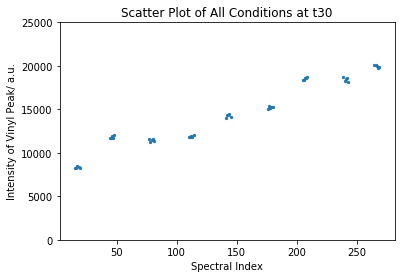

In [34]:
x = df_.index # Extract row indices (spectral index).
y = df_.iloc[:,378] # Extract intensity of vinyl peak.
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Scatter Plot of All Conditions at t30')
plt.ylim(0, 25000)

plt.scatter(x,y, s = 5) # Render a scatter plot between x and y, with size of dots = 5.
plt.show()

# Verify Manual Labeling Accuracy

In [35]:
df_['Condition'] = df_['Condition'].astype('category')
df_['Condition'].nunique()
# Verify number of unique categories. This must correspond with the number of conditions.

9

In [36]:
# Inspect df_.
df_

,Condition,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
15,10,4863.0,5553.0,5708.0,5387.0,4885.0,4676.0,4343.0,3935.0,3654.0,...,116.0,149.0,93.0,131.0,78.0,155.0,65.0,123.0,138.0,134.0
16,10,4903.0,5497.0,5699.0,5427.0,4934.0,4731.0,4249.0,3925.0,3596.0,...,89.0,129.0,46.0,170.0,42.0,108.0,69.0,97.0,96.0,147.0
17,10,4945.0,5529.0,5617.0,5465.0,5101.0,4683.0,4317.0,3893.0,3834.0,...,117.0,163.0,77.0,168.0,148.0,83.0,94.0,159.0,135.0,117.0
18,10,5036.0,5627.0,5917.0,5626.0,5171.0,4752.0,4388.0,3876.0,3852.0,...,82.0,154.0,103.0,174.0,69.0,103.0,78.0,157.0,92.0,132.0
19,10,5036.0,5627.0,5766.0,5660.0,5175.0,4685.0,4352.0,4042.0,3629.0,...,114.0,118.0,70.0,101.0,71.0,116.0,88.0,118.0,98.0,145.0
44,11,6748.0,7598.0,7839.0,7517.0,7266.0,6444.0,5980.0,5425.0,4978.0,...,108.0,139.0,94.0,169.0,126.0,102.0,80.0,99.0,122.0,109.0
45,11,6898.0,7654.0,7858.0,7634.0,7102.0,6572.0,5824.0,5462.0,5044.0,...,85.0,96.0,89.0,166.0,82.0,108.0,27.0,86.0,64.0,66.0
46,11,7104.0,7829.0,7889.0,7714.0,7181.0,6583.0,5852.0,5461.0,5101.0,...,123.0,178.0,95.0,150.0,128.0,130.0,42.0,128.0,63.0,135.0
47,11,6978.0,7657.0,8137.0,7511.0,6996.0,6522.0,6015.0,5479.0,5164.0,...,81.0,59.0,57.0,168.0,63.0,49.0,24.0,93.0,65.0,40.0
48,11,7021.0,7802.0,8150.0,7841.0,7153.0,6542.0,5926.0,5471.0,5142.0,...,135.0,101.0,131.0,157.0,126.0,93.0,39.0,119.0,122.0,95.0


In [37]:
# Generate summary statistics for the vinyl wavenumber.
df_[['Condition', '1629.357641']].groupby('Condition').describe()

1629.357641                                                  \
                count     mean         std      min      25%      50%   
Condition                                                               
10                5.0   8152.4  109.413436   8035.0   8086.0   8118.0   
11                5.0  11943.0   75.577775  11814.0  11957.0  11964.0   
12                5.0  11548.2  131.983711  11449.0  11460.0  11462.0   
13                5.0  11948.0   34.307434  11913.0  11915.0  11947.0   
14                5.0  14286.0  154.659303  14114.0  14226.0  14229.0   
15                5.0  14851.8   83.771714  14758.0  14817.0  14833.0   
16                5.0  18228.6  173.364645  17974.0  18140.0  18291.0   
17                5.0  18051.6  182.847751  17855.0  18000.0  18016.0   
18                5.0  19876.0  252.099187  19692.0  19736.0  19746.0   

                             
               75%      max  
Condition                    
10          8213.0   8310.0  
11         11966.0  12014.0  
12         11625.0  11745.0  
13         11980.0  11985.0  
14         14337.0  14524.0  
15         14867.0  14984.0  
16         18323.0  18415.0  
17         18034.0  18353.0  
18         19902.0  20304.0

In [38]:
# Write extracted dataframe to csv file.
df_.to_csv(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\201020 High Throughput Experiment Conditions 10 to 18\Online Raman\df_t30.csv')